In [1]:
import salem
import numpy as np  # 数据处理用
import matplotlib.pyplot as plt  # 画图用
import cartopy.crs as ccrs  # 投影用

In [2]:
data = salem.open_wrf_dataset(r'D:\work\station\MID\exp1-gaungzhou\data\wrfout_d02_2022-03-30_06_00_00.nc')
data

<xarray.Dataset>
Dimensions:                (south_north: 159, west_east: 159, time: 1, bottom_top: 39, soil_layers: 4, seed_dim: 1)
Coordinates:
    lat                    (south_north, west_east) float32 15.91 ... 28.29
    lon                    (south_north, west_east) float32 105.9 ... 119.0
    xtime                  (time) datetime64[ns] ...
  * time                   (time) datetime64[ns] 2022-03-30T06:00:00
  * west_east              (west_east) float64 -8.46e+05 -8.37e+05 ... 5.76e+05
  * south_north            (south_north) float64 -6.84e+05 ... 7.38e+05
Dimensions without coordinates: bottom_top, soil_layers, seed_dim
Data variables: (12/207)
    LU_INDEX               (time, south_north, west_east) float32 ...
    ZNU                    (time, bottom_top) float32 ...
    ZNW                    (time, bottom_top) float32 ...
    ZS                     (time, soil_layers) float32 ...
    DZS                    (time, soil_layers) float32 ...
    VAR_SSO                (time, south_north, west_east) float32 ...
    ...                     ...
    TK                     (time, bottom_top, south_north, west_east) float32 ...
    WS                     (time, bottom_top, south_north, west_east) float32 ...
    PRESSURE               (time, bottom_top, south_north, west_east) float32 ...
    GEOPOTENTIAL           (time, bottom_top, south_north, west_east) float32 ...
    Z                      (time, bottom_top, south_north, west_east) float32 ...
    SLP                    (time, south_north, west_east) float32 ...
Attributes: (12/133)
    TITLE:                            OUTPUT FROM WRF V4.2 MODEL
    START_DATE:                      2022-03-30_06:00:00
    SIMULATION_START_DATE:           2022-03-30_06:00:00
    WEST-EAST_GRID_DIMENSION:        160
    SOUTH-NORTH_GRID_DIMENSION:      160
    BOTTOM-TOP_GRID_DIMENSION:       40
    ...                              ...
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    pyproj_srs:                      +proj=lcc +lat_0=22.0000076293945 +lon_0...

In [3]:
datau500 = data.salem.wrf_plevel('U', levels=500)
datav500 = data.salem.wrf_plevel('V', levels=500)
datag500 = data.salem.wrf_plevel('GEOPOTENTIAL', levels=500) / 100
dataw500 = data.salem.wrf_plevel('QVAPOR', levels=500)
datat500 = data.salem.wrf_plevel('TK', levels=500) - 273.15

datau850 = data.salem.wrf_plevel('U', levels=850)
datav850 = data.salem.wrf_plevel('V', levels=850)
datag850 = data.salem.wrf_plevel('GEOPOTENTIAL', levels=850) / 100
dataw850 = data.salem.wrf_plevel('QVAPOR', levels=850)
datat850 = data.salem.wrf_plevel('TK', levels=850) - 273.15

datau700 = data.salem.wrf_plevel('U', levels=700)
datav700 = data.salem.wrf_plevel('V', levels=700)
datag700 = data.salem.wrf_plevel('GEOPOTENTIAL', levels=700) / 100
dataw700 = data.salem.wrf_plevel('QVAPOR', levels=700)
datat700 = data.salem.wrf_plevel('TK', levels=700) - 273.15

datau925 = data.salem.wrf_plevel('U', levels=925)
datav925 = data.salem.wrf_plevel('V', levels=925)
datag925 = data.salem.wrf_plevel('GEOPOTENTIAL', levels=925) / 100
dataw925 = data.salem.wrf_plevel('QVAPOR', levels=925)
datat925 = data.salem.wrf_plevel('TK', levels=925) - 273.15

In [4]:
print('------------500---------------')
print(datau500.max(), datau500.min())
print(datag500.max(), datag500.min())
print(datat500.max(), datat500.min())
print(dataw500.max(), dataw500.min())

print('------------700---------------')
print(datau700.max(), datau700.min())
print(datag700.max(), datag700.min())
print(datat700.max(), datat700.min())
print(dataw700.max(), dataw700.min())

print('------------850---------------')
print(datau850.max(), datau850.min())
print(datag850.max(), datag850.min())
print(datat850.max(), datat850.min())
print(dataw850.max(), dataw850.min())

print('------------925---------------')
print(datau925.max(), datau925.min())
print(datag925.max(), datag925.min())
print(datat925.max(), datat925.min())
print(dataw925.max(), dataw925.min())

lat = data['lat'].data
lon = data['lon'].data
# print(lat, lon)

------------500---------------
<xarray.DataArray 'U' ()>
array(20.47593621)
Coordinates:
    p        int32 500 <xarray.DataArray 'U' ()>
array(-9.37960998)
Coordinates:
    p        int32 500
<xarray.DataArray 'GEOPOTENTIAL' ()>
array(577.8503594)
Coordinates:
    p        int32 500 <xarray.DataArray 'GEOPOTENTIAL' ()>
array(567.03172429)
Coordinates:
    p        int32 500
<xarray.DataArray 'TK' ()>
array(-3.29398986)
Coordinates:
    p        int32 500 <xarray.DataArray 'TK' ()>
array(-10.4636526)
Coordinates:
    p        int32 500
<xarray.DataArray 'QVAPOR' ()>
array(0.00516327)
Coordinates:
    p        int32 500 <xarray.DataArray 'QVAPOR' ()>
array(0.00050199)
Coordinates:
    p        int32 500
------------700---------------
<xarray.DataArray 'U' ()>
array(14.45641236)
Coordinates:
    p        int32 700 <xarray.DataArray 'U' ()>
array(-13.75883104)
Coordinates:
    p        int32 700
<xarray.DataArray 'GEOPOTENTIAL' ()>
array(311.66282148)
Coordinates:
    p        int32 700 <

In [5]:
def drawmap():
    fig = plt.figure(figsize=(10, 8))  # 画布大小
    ax = fig.subplots(1, 1, subplot_kw={
        'projection': ccrs.LambertConformal(central_longitude=113.0, central_latitude=22.0, )})  # 画图个数
    ax.coastlines('50m')
    box1 = [106, 118, 16.00, 27.00]
    ax.set_extent(box1, crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
                 linestyle=':', auto_inline=False, rotate_labels=False)
    return ax, fig

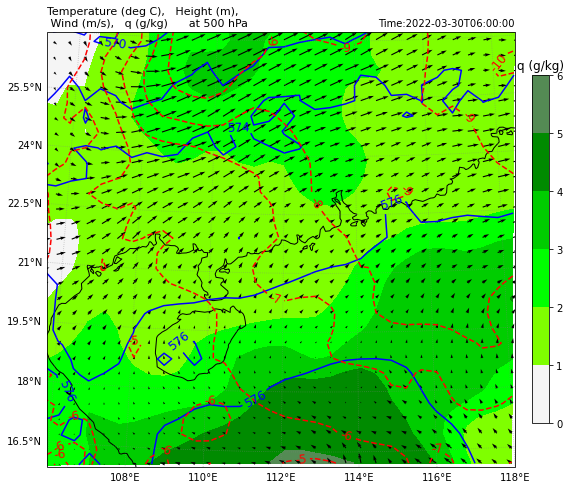

In [6]:
# ------------------------500hPa绘图----------------------------- #
ax1, fig1 = drawmap()
line = ax1.contour(lon[::5, ::5], lat[::5, ::5], datag500[0, ::5, ::5], levels=np.arange(520, 600, 2), 
                   colors='blue', transform=ccrs.PlateCarree())
ax1.clabel(line, inline=True, fontsize=12, fmt='%.0f')
line = ax1.contour(lon[::5, ::5], lat[::5, ::5], datat500[0, ::5, ::5], levels=np.arange(-11, -4, 1), colors='r', 
                   transform=ccrs.PlateCarree())
ax1.clabel(line, inline=True, fontsize=12, fmt='%.0f')
colorbar = ax1.contourf(lon[::5, ::5], lat[::5, ::5], dataw500[0, ::5, ::5] * 1000, levels=[0, 1, 2, 3, 4, 5, 6], 
                        colors=['#f5f5f5', '#7fff00', '#00ff00', '#00cd00', '#008b00', '#548b54'], 
                        transform=ccrs.PlateCarree())
cb = fig1.colorbar(colorbar, extendrect='True', pad=0.03, fraction=0.1, shrink=0.8)
cb.ax.set_title('q (g/kg)')
ax1.quiver(lon[::5, ::5], lat[::5, ::5], 
           datau500.loc[np.datetime64('2022-03-30T06:00:00'), ::5, ::5].data, 
           datav500.loc[np.datetime64('2022-03-30T06:00:00'), ::5, ::5].data, 
           color='k', transform=ccrs.PlateCarree())
ax1.set_title('Temperature (deg C),   Height (m),  \n Wind (m/s),   q (g/kg)      at 500 hPa', fontdict={'fontsize': 11}, loc='left')
ax1.set_title("Time:" + str(datau500['time'].data[0])[0:19], fontdict={'fontsize': 10}, loc='right')
plt.show()